In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import numpy as np

In [1]:
# TODO evaluatin of the contaminated  runs

In [6]:
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  
ARGS_PATH= os.path.join(DATASET,run ,experiment+ f'{category}', "args.log")
VALS_PATH= os.path.join(DATASET,run ,experiment+ f'{category}', "validation_result.log")

### Inspect training criteria

In [57]:
def read_train_loss(PATH):
    with open(PATH, 'r') as file:
        lines = file.readlines()
        
        lines=[line for line in lines if line.startswith("[")]
        lines = [line.strip() for line in lines]   
    lines_new=[float(re.findall(r"Loss:(\d+\.\d+)", item)[0]) for item in lines]
    return lines_new

def read_validation_score(PATH):
    resdict={"image ROCAUC":[],"pixel ROCAUC":[],"unalign image ROCAUC":[],"unalign pixel ROCAUC":[]}
    with open(PATH, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]     

    for key in resdict.keys():
        pattern = f"{key}"+r':\s*(\d+\.\d+)'
        lines_new=[]
        for line in lines:
            match = re.search(pattern, line)  
            if match:
                lines_new.append(match.group(1))         
        resdict[key]=lines_new
    return resdict

def get_categories_from_run_path(PATH):
    regex_pattern = r'-(\w+)$'
    extracted_categories = [re.search(regex_pattern, category).group(1) for category in list(os.listdir(PATH))]
    return extracted_categories

def plot_losses(RESPATH,dataset,run,experiment):
    
    RUN_PATH= os.path.join(RESPATH, dataset,run)
    categories=get_categories_from_run_path(RUN_PATH)
    for category in categories:
        ARGS_PATH= os.path.join(RUN_PATH, experiment+ f'{category}', "args.log")
        losses=read_train_loss(ARGS_PATH)
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.axhline(y=0.01, color='r', linestyle='dotted')
        plt.title(f'Training Loss {category},{experiment}')
        plt.show()

def plot_vals(RESPATH,dataset,run,experiment):
    RUN_PATH= os.path.join(RESPATH, dataset,run)
    categories=get_categories_from_run_path(RUN_PATH)
    
    for category in categories:
        VALS_PATH = os.path.join(RESPATH, dataset, run, experiment + f'{category}', "validation_result.log")
        if not os.path.exists(VALS_PATH):
            continue
        valdict = read_validation_score(VALS_PATH)
        
        # Plotting
        keys = list(valdict.keys())
        values = [list(map(float, v)) for v in valdict.values()]  # Convert values to float
        
        # Creating a figure for each category
        fig, ax = plt.subplots()
        # Set position of bar on X axis
        positions = np.arange(len(keys))
        
        # Make the plot
        for idx, key in enumerate(keys):
            ax.bar(positions[idx], np.mean(values[idx]), yerr=np.std(values[idx]), label=key)
        
        # Add some text for labels, title, and custom x-axis tick labels, etc.
        ax.set_ylabel('Scores')
        ax.set_title(f'Scores by category and metric for {category}')
        ax.set_xticks(positions)
        ax.set_xticklabels(keys)
        ax.legend()
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


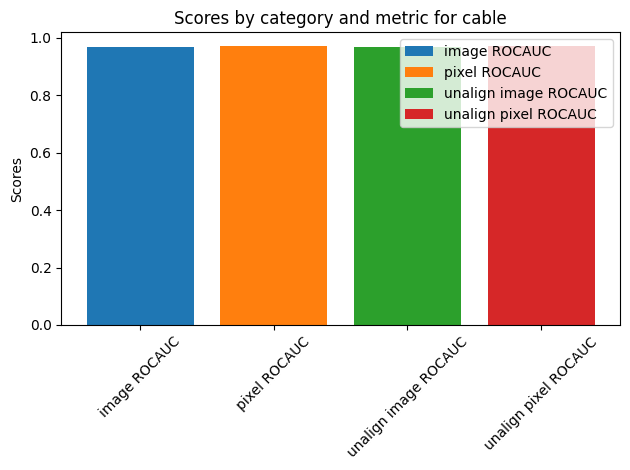

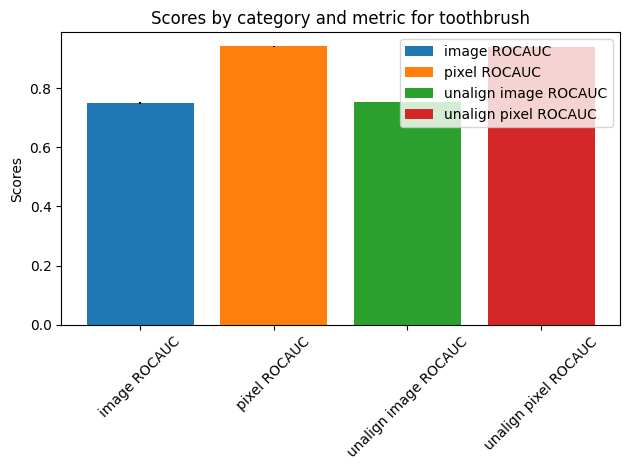

/home/bule/anaconda3/envs/ultrad/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bule/anaconda3/envs/ultrad/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/bule/anaconda3/envs/ultrad/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bule/anaconda3/envs/ultrad/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/bule/anaconda3/envs/ultrad/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


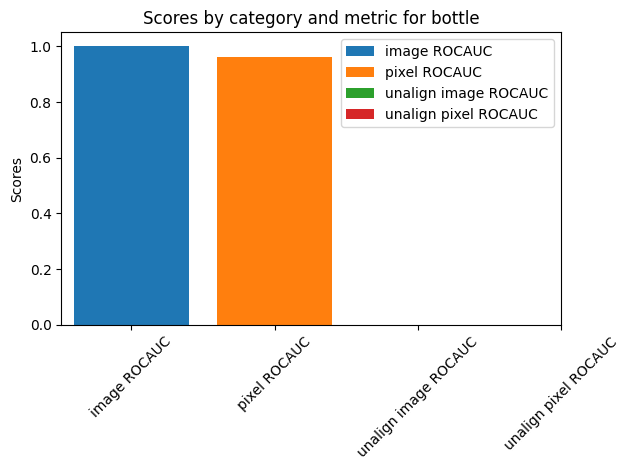

In [58]:
plot_vals(RESPATH,dataset,run="clean",experiment="Exp0-r18-")

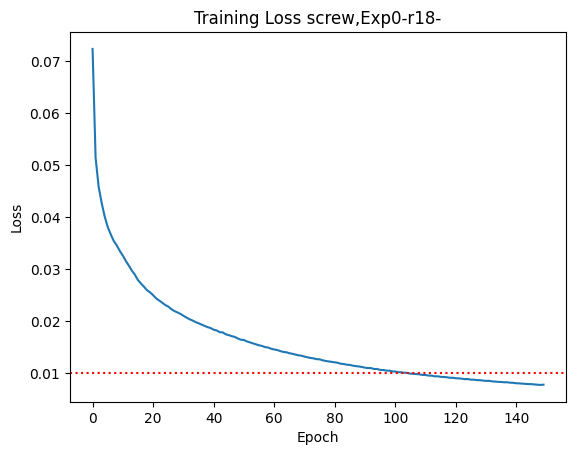

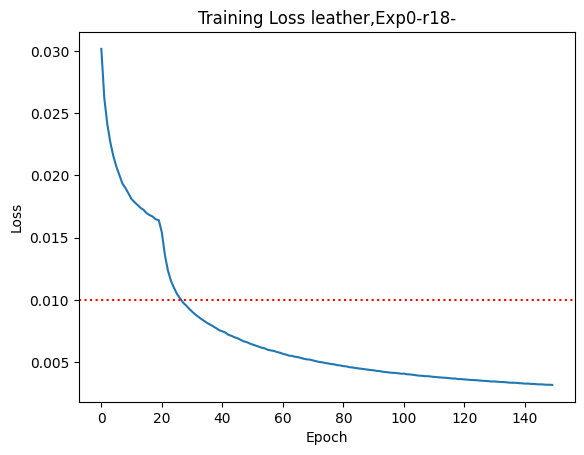

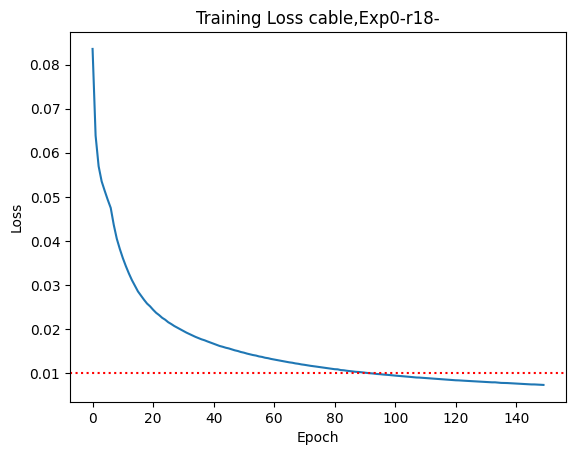

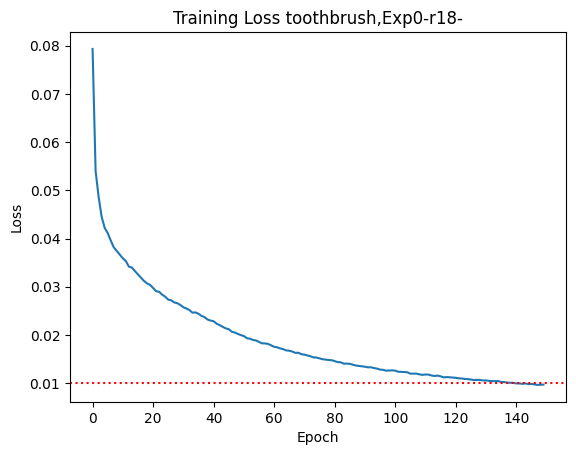

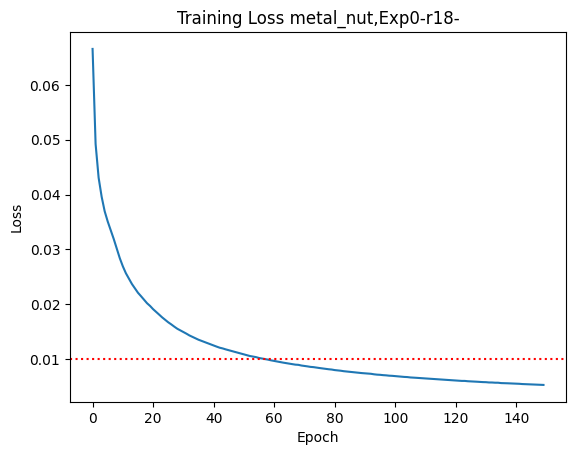

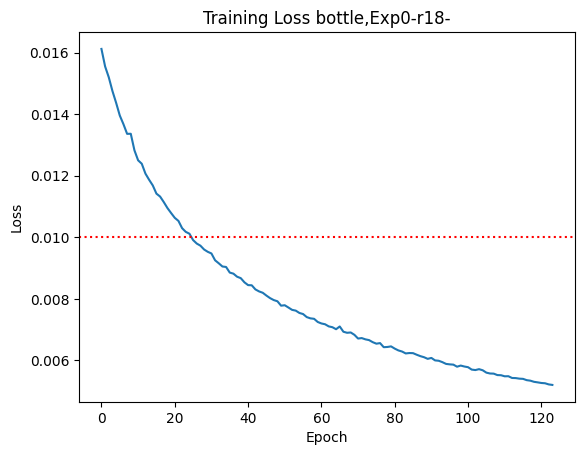

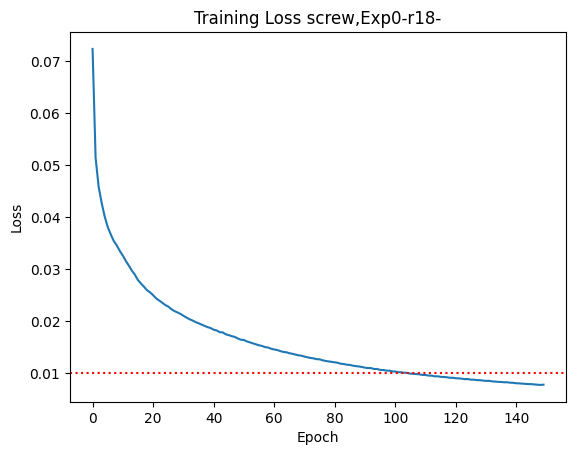

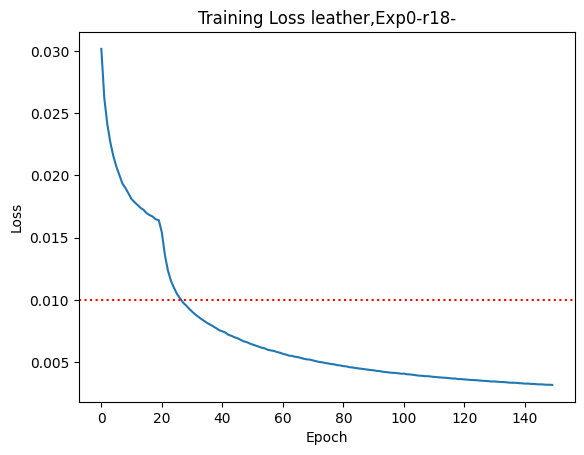

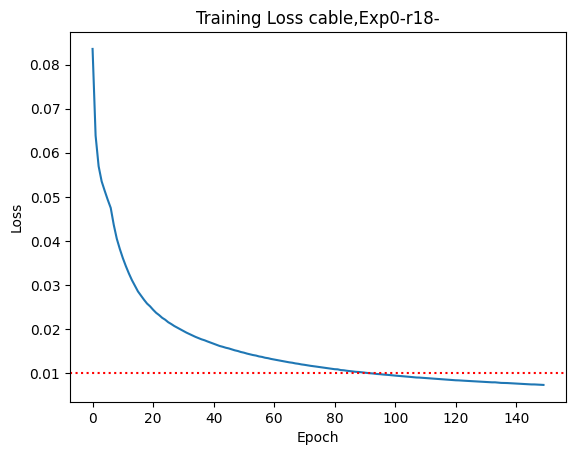

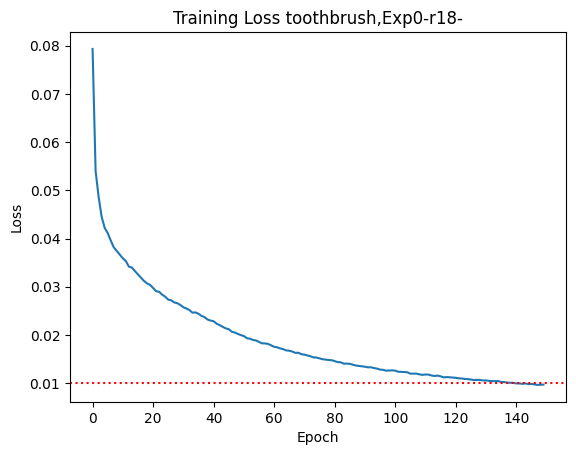

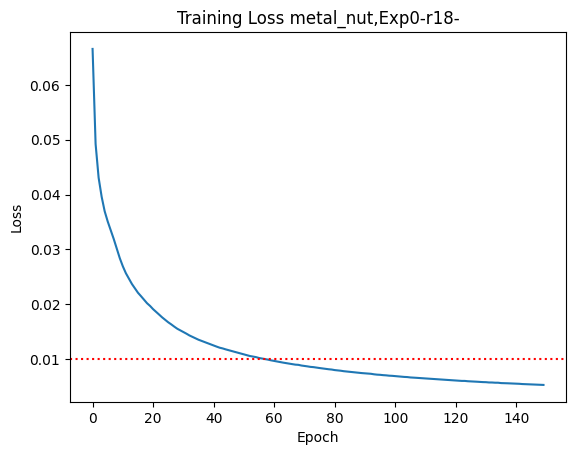

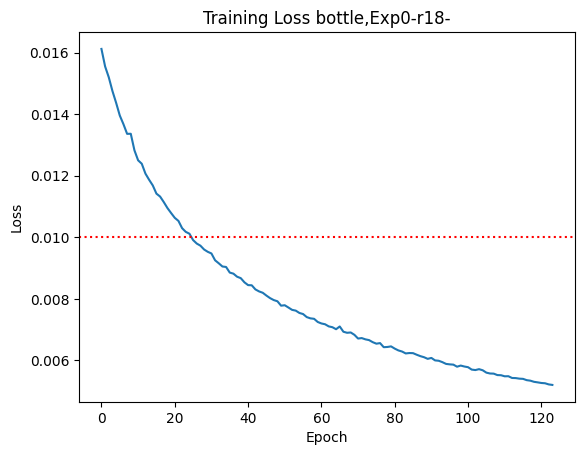

In [32]:


plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

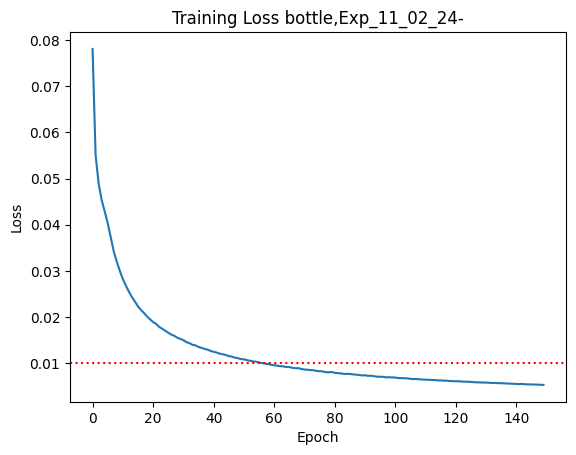

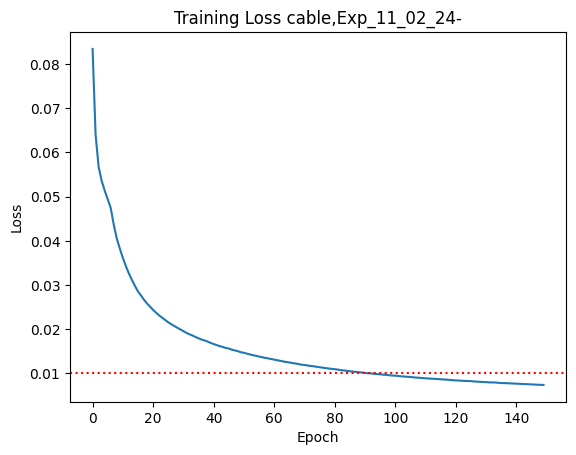

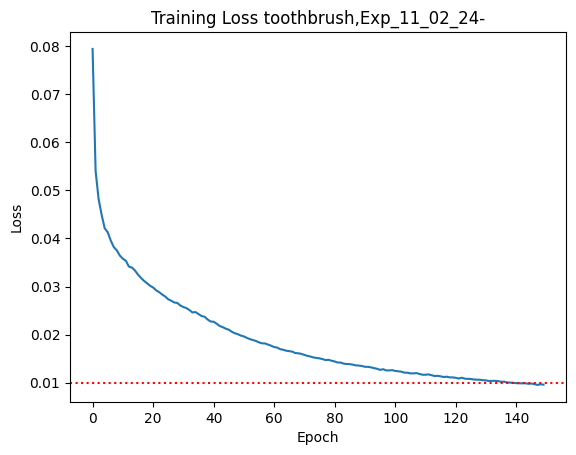

In [20]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

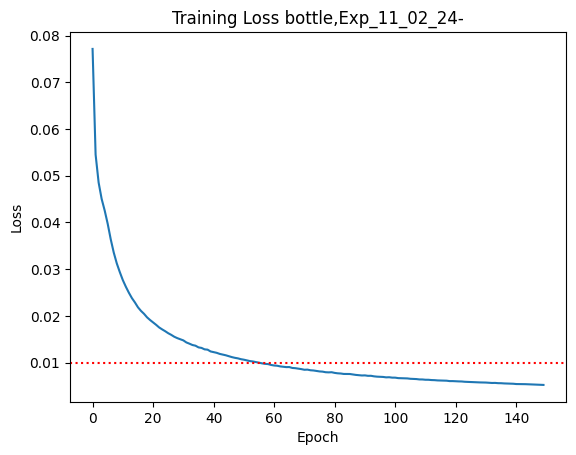

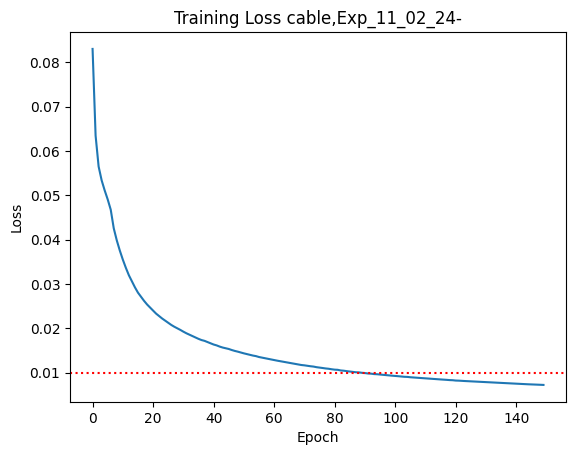

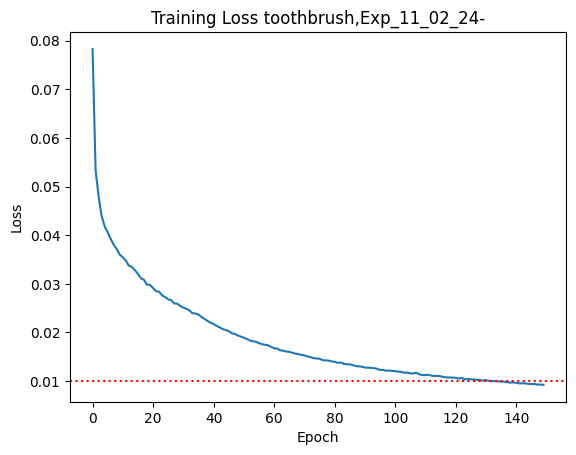

In [21]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")